In [4]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

#APIs for Financial Data
import fix_yahoo_finance
import quandl 

aapl = pd.read_excel('C:/Users/e5553468/Desktop/WF FRTB/aapl_data.xlsx', sheet_name='aapl_data')

print(aapl)

           Date     Open     High       Low    Close    Volume  Ex-Dividend  \
0    2008-07-01  164.050  174.720  164.0000  174.680  39688600          0.0   
1    2008-07-02  175.050  177.450  168.1788  168.180  29911400          0.0   
2    2008-07-03  169.590  172.170  165.7500  170.120  18691500          0.0   
3    2008-07-07  173.000  177.130  171.9000  175.160  29299700          0.0   
4    2008-07-08  175.400  179.700  172.7401  179.550  31726800          0.0   
5    2008-07-09  180.250  180.910  174.1400  174.250  31992000          0.0   
6    2008-07-10  174.910  177.340  171.3700  176.630  30024600          0.0   
7    2008-07-11  175.370  177.110  171.0000  172.580  33214700          0.0   
8    2008-07-14  175.370  179.300  173.0800  173.880  31644800          0.0   
9    2008-07-15  172.300  173.740  166.3900  169.640  37144400          0.0   
10   2008-07-16  170.080  172.930  168.6000  172.810  26706800          0.0   
11   2008-07-17  174.090  174.980  171.3900  171.810

In [7]:
## 1. Importing Data

## Database code - Stock Code

#aapl = quandl.get("WIKI/AAPL", 
                  #start_date="2008-07-01", 
                  #end_date="2018-07-12")
#aapl.head()

In [8]:
aapl.head(5)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2008-07-01,164.05,174.72,164.0000,174.68,39688600,0.0,1,21.082711,22.453955,21.076286,22.448815,277820200
1,2008-07-02,175.05,177.45,168.1788,168.18,29911400,0.0,1,22.496365,22.804798,21.613320,21.613474,209379800
2,2008-07-03,169.59,172.17,165.7500,170.12,18691500,0.0,1,21.794679,22.126245,21.301185,21.862791,130840500
3,2008-07-07,173.00,177.13,171.9000,175.16,29299700,0.0,1,22.232911,22.763674,22.091546,22.510501,205097900
4,2008-07-08,175.40,179.70,172.7401,179.55,31726800,0.0,1,22.541345,23.093955,22.199510,23.074678,222087600


In [11]:
## 2. Working with Time Series Data

# Inspect the index 
#@aapl.index

# Inspect the columns
#aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]
ts

# Check the type of `ts` 
#type(ts)

2440    178.440
2441    178.650
2442    178.020
2443    175.300
2444    175.240
2445    171.270
2446    168.845
2447    164.940
2448    172.770
2449    168.340
Name: Close, dtype: float64

In [90]:
# Inspect the first rows of November-December 2008# Inspec 
#print(aapl.loc[pd.Timestamp('2008-11-01'):pd.Timestamp('2008-12-31')].head())

# Inspect the first rows of 2008
#print(aapl.loc['2008'].head())

# Inspect July 2008
#print(aapl.iloc[0:22])

# Inspect the 'Open' and 'Close' values at 2008-08-01 and 2008-09-01
print(aapl.iloc[[22,43], [0, 3]])


              Open   Close
Date                      
2008-08-01  159.94  156.66
2008-09-02  172.40  166.19


In [68]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
#print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]


In [70]:
aapl.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,diff
Date,,,,,,,,,,,,,
2008-07-01,164.05,174.72,164.0000,174.68,39688600.0,0.0,1.0,21.082711,22.453955,21.076286,22.448815,277820200.0,-10.63
2008-07-02,175.05,177.45,168.1788,168.18,29911400.0,0.0,1.0,22.496365,22.804798,21.613320,21.613474,209379800.0,6.87
2008-07-03,169.59,172.17,165.7500,170.12,18691500.0,0.0,1.0,21.794679,22.126245,21.301185,21.862791,130840500.0,-0.53
2008-07-07,173.00,177.13,171.9000,175.16,29299700.0,0.0,1.0,22.232911,22.763674,22.091546,22.510501,205097900.0,-2.16
2008-07-08,175.40,179.70,172.7401,179.55,31726800.0,0.0,1.0,22.541345,23.093955,22.199510,23.074678,222087600.0,-4.15


In [12]:
# Add a column `diff` to `aapl` 
aapl['Diff'] = aapl.Open - aapl.Close

aapl


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Diff
0,2008-07-01,164.050,174.720,164.0000,174.680,39688600,0.0,1,21.082711,22.453955,21.076286,22.448815,277820200,-10.630
1,2008-07-02,175.050,177.450,168.1788,168.180,29911400,0.0,1,22.496365,22.804798,21.613320,21.613474,209379800,6.870
2,2008-07-03,169.590,172.170,165.7500,170.120,18691500,0.0,1,21.794679,22.126245,21.301185,21.862791,130840500,-0.530
3,2008-07-07,173.000,177.130,171.9000,175.160,29299700,0.0,1,22.232911,22.763674,22.091546,22.510501,205097900,-2.160
4,2008-07-08,175.400,179.700,172.7401,179.550,31726800,0.0,1,22.541345,23.093955,22.199510,23.074678,222087600,-4.150
5,2008-07-09,180.250,180.910,174.1400,174.250,31992000,0.0,1,23.164637,23.249456,22.379417,22.393554,223944000,6.000
6,2008-07-10,174.910,177.340,171.3700,176.630,30024600,0.0,1,22.478373,22.790662,22.023433,22.699417,210172200,-1.720
7,2008-07-11,175.370,177.110,171.0000,172.580,33214700,0.0,1,22.537489,22.761103,21.975883,22.178935,232502900,2.790
8,2008-07-14,175.370,179.300,173.0800,173.880,31644800,0.0,1,22.537489,23.042549,22.243192,22.346003,221513600,1.490
9,2008-07-15,172.300,173.740,166.3900,169.640,37144400,0.0,1,22.142951,22.328012,21.383434,21.801104,260010800,2.660


In [13]:
# Delete the new `diff` column
del aapl['Diff']

aapl

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2008-07-01,164.050,174.720,164.0000,174.680,39688600,0.0,1,21.082711,22.453955,21.076286,22.448815,277820200
1,2008-07-02,175.050,177.450,168.1788,168.180,29911400,0.0,1,22.496365,22.804798,21.613320,21.613474,209379800
2,2008-07-03,169.590,172.170,165.7500,170.120,18691500,0.0,1,21.794679,22.126245,21.301185,21.862791,130840500
3,2008-07-07,173.000,177.130,171.9000,175.160,29299700,0.0,1,22.232911,22.763674,22.091546,22.510501,205097900
4,2008-07-08,175.400,179.700,172.7401,179.550,31726800,0.0,1,22.541345,23.093955,22.199510,23.074678,222087600
5,2008-07-09,180.250,180.910,174.1400,174.250,31992000,0.0,1,23.164637,23.249456,22.379417,22.393554,223944000
6,2008-07-10,174.910,177.340,171.3700,176.630,30024600,0.0,1,22.478373,22.790662,22.023433,22.699417,210172200
7,2008-07-11,175.370,177.110,171.0000,172.580,33214700,0.0,1,22.537489,22.761103,21.975883,22.178935,232502900
8,2008-07-14,175.370,179.300,173.0800,173.880,31644800,0.0,1,22.537489,23.042549,22.243192,22.346003,221513600
9,2008-07-15,172.300,173.740,166.3900,169.640,37144400,0.0,1,22.142951,22.328012,21.383434,21.801104,260010800


In [14]:
## Common Financial Analysis

# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj. Close']]

## calculate daily returns and add as a column
aapl['daily_pct_c'] = daily_close.pct_change()

# Replace NA values with 0
aapl['daily_pct_c'].fillna(0, inplace=True)

# Daily log returns
aapl['daily_log_returns'] = np.log(daily_close.pct_change()+1)

# Replace NA values with 0
aapl['daily_log_returns'].fillna(0, inplace=True)

#Print aapl
aapl

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,daily_pct_c,daily_log_returns
0,2008-07-01,164.050,174.720,164.0000,174.680,39688600,0.0,1,21.082711,22.453955,21.076286,22.448815,277820200,0.000000,0.000000
1,2008-07-02,175.050,177.450,168.1788,168.180,29911400,0.0,1,22.496365,22.804798,21.613320,21.613474,209379800,-0.037211,-0.037921
2,2008-07-03,169.590,172.170,165.7500,170.120,18691500,0.0,1,21.794679,22.126245,21.301185,21.862791,130840500,0.011535,0.011469
3,2008-07-07,173.000,177.130,171.9000,175.160,29299700,0.0,1,22.232911,22.763674,22.091546,22.510501,205097900,0.029626,0.029196
4,2008-07-08,175.400,179.700,172.7401,179.550,31726800,0.0,1,22.541345,23.093955,22.199510,23.074678,222087600,0.025063,0.024754
5,2008-07-09,180.250,180.910,174.1400,174.250,31992000,0.0,1,23.164637,23.249456,22.379417,22.393554,223944000,-0.029518,-0.029963
6,2008-07-10,174.910,177.340,171.3700,176.630,30024600,0.0,1,22.478373,22.790662,22.023433,22.699417,210172200,0.013659,0.013566
7,2008-07-11,175.370,177.110,171.0000,172.580,33214700,0.0,1,22.537489,22.761103,21.975883,22.178935,232502900,-0.022929,-0.023196
8,2008-07-14,175.370,179.300,173.0800,173.880,31644800,0.0,1,22.537489,23.042549,22.243192,22.346003,221513600,0.007533,0.007505
9,2008-07-15,172.300,173.740,166.3900,169.640,37144400,0.0,1,22.142951,22.328012,21.383434,21.801104,260010800,-0.024385,-0.024687


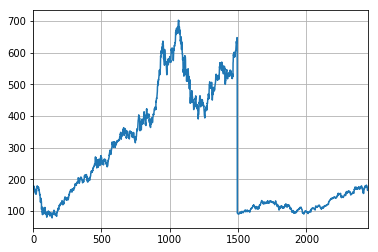

In [15]:
# Import Matplotlib's `pyplot` module as `plt`# Import 
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

# Plot the closing prices for `aapl`
df = aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

In [16]:
## Save to Excel

writer = pd.ExcelWriter('Python_aapl_analysis.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
aapl.to_excel(writer,  sheet_name='2008-2018')


# Close the Pandas Excel writer and output the Excel file.
writer.save()